### Inspecting Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('expenses.csv')
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3608 entries, 0 to 3607
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      3608 non-null   object 
 1   category  3608 non-null   object 
 2   amount    3608 non-null   float64
dtypes: float64(1), object(2)
memory usage: 84.7+ KB


,amount
count,3608.000000
mean,17.130241
std,84.946260
min,0.050000
25%,4.800000
50%,7.100000
75%,11.505000
max,2500.000000


In [2]:
df['date'] = pd.to_datetime(df['date'],errors='coerce')
df['amount'] = pd.to_numeric(df['amount'], errors='coerce')
df['day'] = df['date'].dt.day_name()
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
df['year_month'] = df['date'].dt.to_period('M')

print(df.dtypes)

date          datetime64[ns, UTC]
category                   object
amount                    float64
day                        object
month                       int32
year                        int32
year_month              period[M]
dtype: object


C:\Users\mazdo\AppData\Local\Temp\ipykernel_3512\1985260056.py:6: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['year_month'] = df['date'].dt.to_period('M')


In [3]:
df

,date,category,amount,day,month,year,year_month
0,2022-07-06 05:57:10+00:00,Restuarant,5.50,Wednesday,7,2022,2022-07
1,2022-07-06 05:57:27+00:00,Market,2.00,Wednesday,7,2022,2022-07
2,2022-07-06 05:58:12+00:00,Coffe,30.10,Wednesday,7,2022,2022-07
3,2022-07-06 05:58:25+00:00,Market,17.33,Wednesday,7,2022,2022-07
4,2022-07-06 05:59:00+00:00,Restuarant,5.50,Wednesday,7,2022,2022-07
...,...,...,...,...,...,...,...
3603,2024-09-28 13:31:37+00:00,Market,8.00,Saturday,9,2024,2024-09
3604,2024-09-29 02:57:07+00:00,Transport,0.50,Sunday,9,2024,2024-09
3605,2024-09-29 04:29:03+00:00,Market,7.40,Sunday,9,2024,2024-09
3606,2024-09-29 04:53:24+00:00,Coffe,15.00,Sunday,9,2024,2024-09


### Cleaning Data

In [4]:
df['category'] = df['category'].str.lower().str.strip()
df['day'] = df['day'].str.lower().str.strip()
df.dropna(subset=['amount'], inplace=True)
df

,date,category,amount,day,month,year,year_month
0,2022-07-06 05:57:10+00:00,restuarant,5.50,wednesday,7,2022,2022-07
1,2022-07-06 05:57:27+00:00,market,2.00,wednesday,7,2022,2022-07
2,2022-07-06 05:58:12+00:00,coffe,30.10,wednesday,7,2022,2022-07
3,2022-07-06 05:58:25+00:00,market,17.33,wednesday,7,2022,2022-07
4,2022-07-06 05:59:00+00:00,restuarant,5.50,wednesday,7,2022,2022-07
...,...,...,...,...,...,...,...
3603,2024-09-28 13:31:37+00:00,market,8.00,saturday,9,2024,2024-09
3604,2024-09-29 02:57:07+00:00,transport,0.50,sunday,9,2024,2024-09
3605,2024-09-29 04:29:03+00:00,market,7.40,sunday,9,2024,2024-09
3606,2024-09-29 04:53:24+00:00,coffe,15.00,sunday,9,2024,2024-09


### Exploring data & Analyzing behavior

In [5]:
day_order = ['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday']

# Daily trend
daily_spend = df.groupby('day')['amount'].sum().reindex(day_order)

# Monthly trend
monthly_spend = df.groupby('month')['amount'].sum()

# Yearly trend
yearly_spend = df.groupby('year')['amount'].sum()

# Category breakdown
category_spend = df.groupby('category')['amount'].sum().sort_values(ascending=False)

In [6]:
print(daily_spend)

day
monday        7187.77
tuesday       8838.84
wednesday    12553.57
thursday      7549.24
friday        8805.89
saturday      8548.67
sunday        8321.93
Name: amount, dtype: float64


In [7]:
print(monthly_spend)

month
1      6231.12
2      2791.50
3      3833.79
4      3931.18
5      6621.38
6      4579.38
7     13563.59
8      4625.80
9      6036.70
10     3729.38
11     2446.12
12     3415.97
Name: amount, dtype: float64


In [8]:
print(yearly_spend)

year
2022    10131.84
2023    25651.22
2024    26022.85
Name: amount, dtype: float64


In [9]:
print(category_spend)

category
restuarant           10425.60
coffe                 9350.70
market                6451.03
health                5896.50
clothing              4365.50
communal              4192.50
travel                3756.45
tech                  2985.00
events                2751.30
learning              2525.31
business lunch        2503.01
sport                 1436.76
other                 1045.75
taxi                   865.08
transport              746.70
motel                  675.00
phone                  666.08
joy                    524.30
business_expenses      400.00
fuel                   114.00
rent car                95.00
film/enjoyment          34.34
Name: amount, dtype: float64


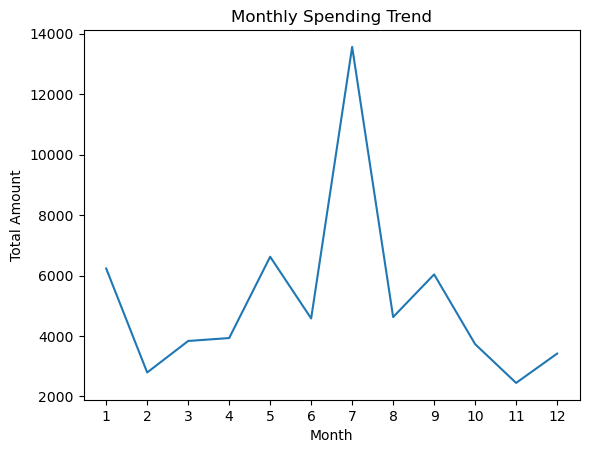

In [10]:
sns.lineplot(x=monthly_spend.index.astype(str), y=monthly_spend.values)
plt.title("Monthly Spending Trend")
plt.xlabel("Month")
plt.ylabel("Total Amount")
plt.show()


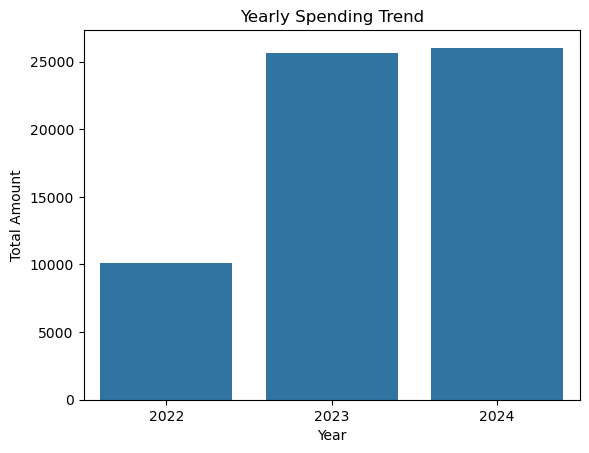

In [11]:
sns.barplot(x=yearly_spend.index, y=yearly_spend.values)
plt.title("Yearly Spending Trend")
plt.xlabel("Year")
plt.ylabel("Total Amount")
plt.show()


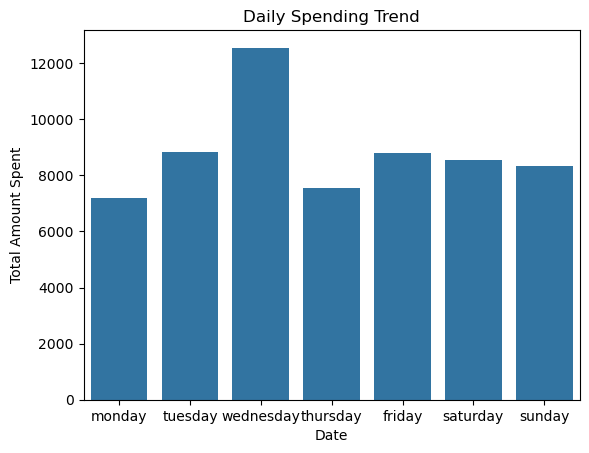

In [12]:
sns.barplot(x=daily_spend.index, y=daily_spend.values)
plt.title("Daily Spending Trend")
plt.xlabel("Date")
plt.ylabel("Total Amount Spent")
plt.show()




Text(0.5, 1.0, 'Spending by Category')

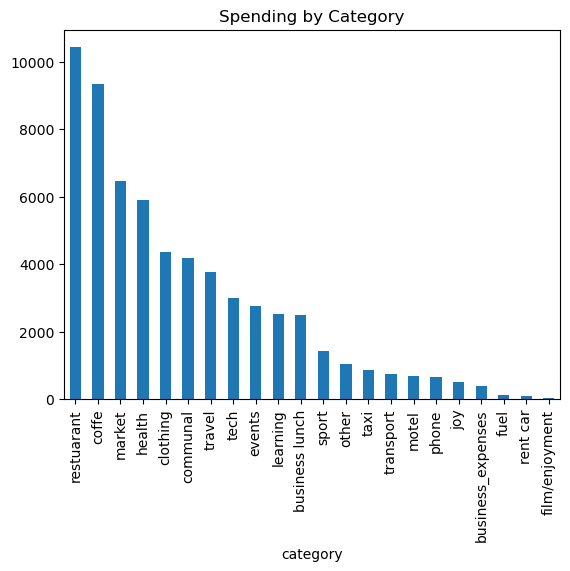

In [13]:
category_spend.plot(kind='bar')
plt.title("Spending by Category")

### Calculate average weekly spending

In [14]:
df.set_index('date', inplace=True)
weekly_spend = df['amount'].resample('W').sum()
avg_weekly_spend = weekly_spend.mean()
print(f"Average weekly spending: {avg_weekly_spend:.2f}")

Average weekly spending: 528.26


### Calculate average monthly spending

In [15]:
monthly_spend = df['amount'].resample('M').sum()
avg_monthly_spend = monthly_spend.mean()
print(f"Average monthly spending: {avg_monthly_spend:.2f}")

Average monthly spending: 2289.11


C:\Users\mazdo\AppData\Local\Temp\ipykernel_3512\1883661532.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_spend = df['amount'].resample('M').sum()


### Comparing weekdays & weekends

In [16]:
weekdays = daily_spend[day_order[:5]].sum()
weekends = daily_spend[day_order[5:]].sum()

print(f"Total spend on weekdays: {weekdays:.2f}")
print(f"Total spend on weekends: {weekends:.2f}")

Total spend on weekdays: 44935.31
Total spend on weekends: 16870.60


### By Hour of the Day

In [17]:
df['time'] = df.index.time
df['hour'] = df.index.hour
spend_by_hour = df.groupby('hour')['amount'].sum()
print(spend_by_hour)



hour
0      312.50
1      106.10
2      162.35
3      603.60
4     2581.24
5     1946.53
6     2741.28
7     4420.90
8     2424.17
9     4248.20
10    3085.12
11    2003.73
12    2420.45
13    2046.33
14    4553.29
15    4188.36
16    2868.29
17    7629.83
18    6490.34
19    5433.82
20     837.29
21     482.80
22     166.00
23      53.39
Name: amount, dtype: float64


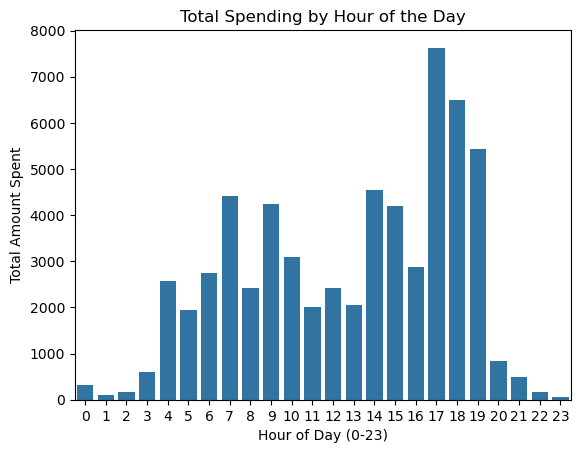

In [18]:
sns.barplot(x=spend_by_hour.index, y=spend_by_hour.values)
plt.title("Total Spending by Hour of the Day")
plt.xlabel("Hour of Day (0-23)")
plt.ylabel("Total Amount Spent")
plt.xticks(range(0, 24))  # show all hours on x-axis
plt.show()


### monthly budget limits per category

In [19]:
monthly_category_spend = df.groupby(['year_month', 'category'])['amount'].sum().reset_index()
category_monthly_stats = monthly_category_spend.groupby('category')['amount'].agg(['mean', 'std', 'max', 'min', 'median'])
category_monthly_stats['budget_limit'] = category_monthly_stats['mean']
print(category_monthly_stats['budget_limit'])

category
business lunch       104.292083
business_expenses    133.333333
clothing             229.763158
coffe                346.322222
communal             174.687500
events               152.850000
film/enjoyment         8.585000
fuel                  19.000000
health               310.342105
joy                   47.663636
learning             109.796087
market               238.927037
motel                675.000000
other                 43.572917
phone                 24.669630
rent car              95.000000
restuarant           386.133333
sport                 71.838000
taxi                  34.603200
tech                 426.428571
transport             27.655556
travel               626.075000
Name: budget_limit, dtype: float64


In [22]:
df.to_csv("final.csv")